In [1]:
import numpy as np
from data_utils import load_data, categorical_to_int, create_results_dict_for
from perf_utils import aggregation_, avg_, TopPercent
from plot_utils import plot_top_cycle, plot_EF, plot_AF
from config import n_ensemble, n_init, n_est, seed_list, categories, acq_funcs, tops
import math

# Data load and process

In [3]:
dataset_name = 'AutoAM'
unique_ds, feature_name, objective_name = load_data(
    dataset_name, invert_y=True)

print(f"##### START: {dataset_name} #####\n")
# unique_ds = categorical_to_int(
#     unique_ds, col_name='gas', categories=categories)
X_feature = unique_ds[feature_name].values
y = np.array(unique_ds[objective_name].values)
n_dataset = len(unique_ds)
# print(f"Number of data in set: {n_dataset}")

# number of top candidates, currently using top 20% of total dataset size
n_top = int(math.ceil(len(y)*tops[-1]))
top_indices = list(unique_ds.sort_values(objective_name).head(n_top).index)
print(f"length dataset: {n_dataset}, nr of top candidates: {n_top}")
unique_ds.head()

##### START: AutoAM #####

length dataset: 100, nr of top candidates: 20


,Prime Delay,Print Speed,X Offset Correction,Y Offset Correction,Score
0,0.0,0.1,-0.837284,-1.000000,-0.138480
1,0.0,0.1,-0.562308,-1.000000,-0.553860
2,0.0,0.1,-0.399772,1.000000,-0.237950
3,0.0,0.1,-0.383307,-0.025953,-0.529015
4,0.0,0.1,-0.263441,-1.000000,-0.444846


In [4]:
# Load ensemble calculation results from framework
# for 50 ensembles, they take some time to run
# we therefore provide sample results for BO algorithm GP_Matern52_LCB2
# please retrieve the following files from vis_demo_calc folder

# TopCodnt_collection_GP_Matern52_LCB2 = np.load('test_run.npy', allow_pickle = True)
# Please replace the above line with the below code if you ran benchmarking framework on your own dataset and obtained results locally. .

# test_run_results = np.load(f'{af_name}_{dataset_name}.npy', allow_pickle = True) 
# TopCount_collection_GP_Matern52_LCB2 = test_run_results[3]
# test_run_results[4]/3600

d = create_results_dict_for(dataset_name, n_top, n_dataset)
print(dataset_name, len(dict(d)))

AutoAM 8


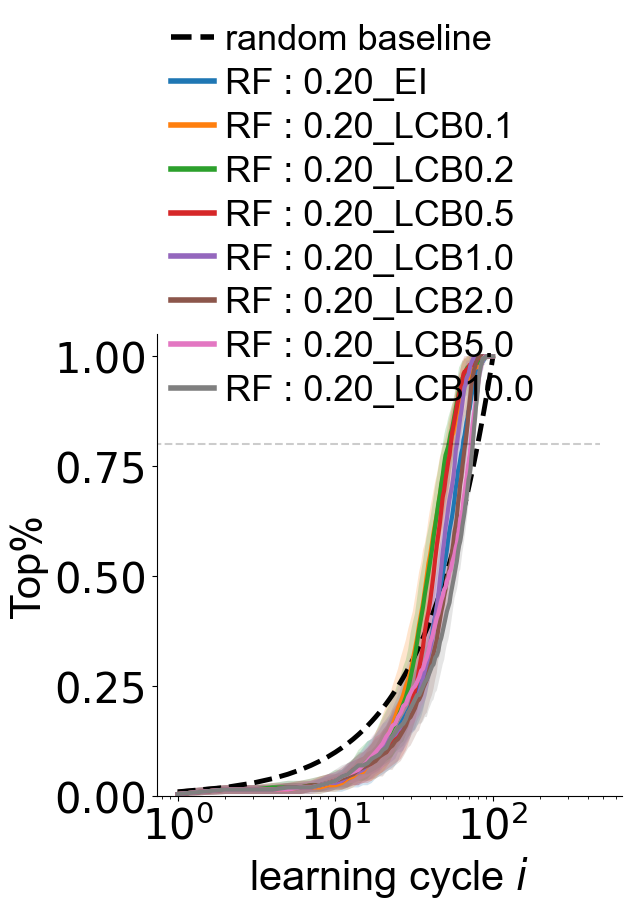

In [5]:
plot_top_cycle(n_dataset,n_top, d, dataset_name)

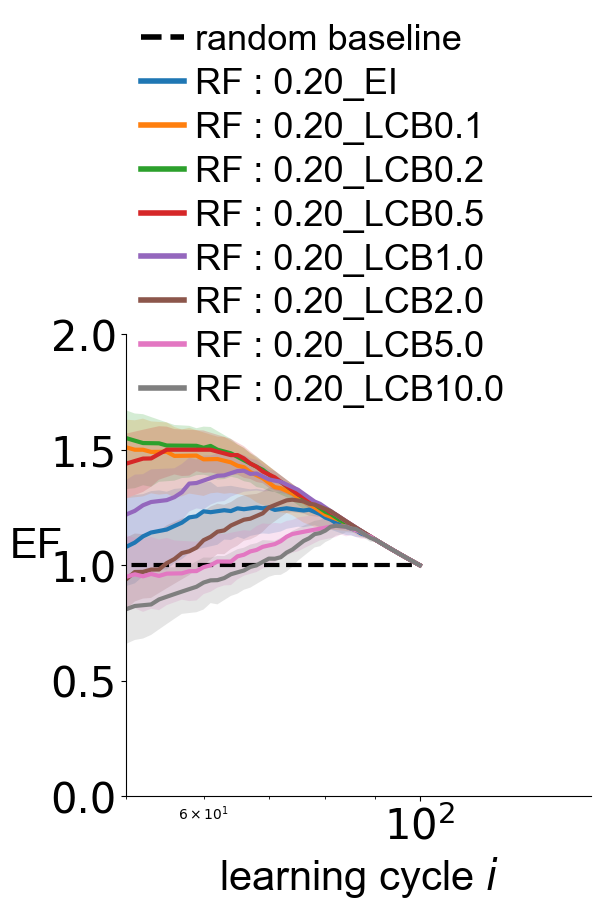

In [6]:
plot_EF(n_dataset, n_top, d, dataset_name)

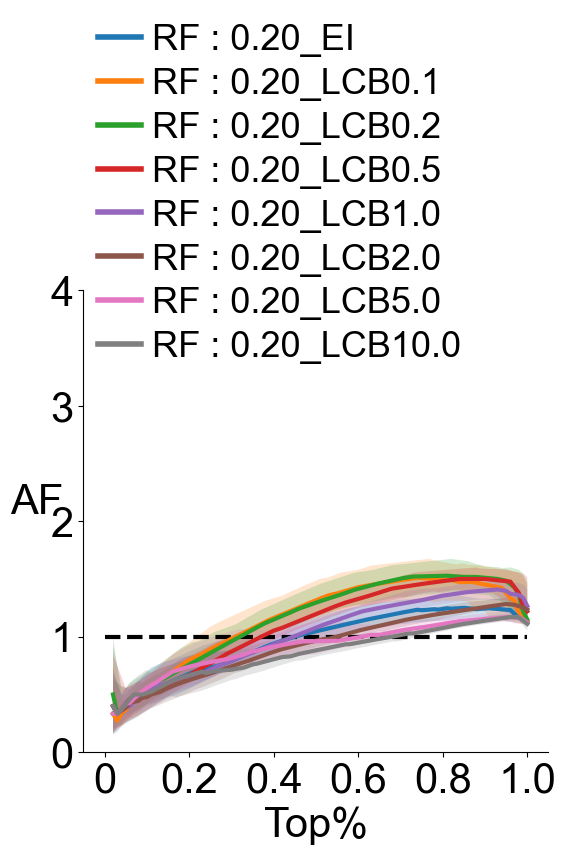

In [7]:
plot_AF(n_top, d, dataset_name)